<a href="https://colab.research.google.com/github/Elisavet235/Git-Workshop/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_AI_Exercise_3_Template_%CE%91%CE%95%CE%9C4554.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ελισάβετ Κυριαζοπούλου 4554

# Part 1 - Supervised Learning

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


## Load Data

In [2]:
data= pd.read_csv('diabetes.csv')
df=pd.DataFrame(data)

## Analyze/Visualize Variables

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

<Axes: title={'center': 'Outcome'}, xlabel='Outcome'>

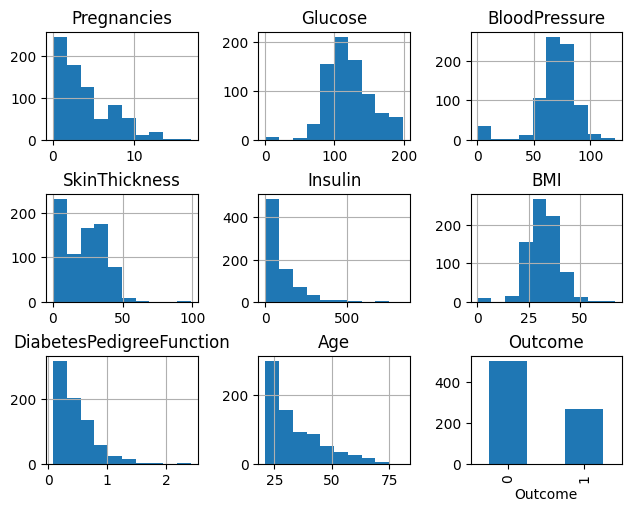

In [3]:
print(df.describe())
df[:-1].hist()
plt.subplots_adjust(left=0.1, right=1,
                    top=1, bottom=0.1,
                    wspace=0.4, hspace=0.5)
counts=df['Outcome'].value_counts()
counts.plot(kind='bar')

## Test Glucose Hypethesis

Από το παρακάτω αποτέλεσμα του κώδικα παρατηρείται ότι γενικά ο μέσος όρος της γλυκόζης στα άτομα που είχαν διαβήτη είναι σημαντικά μεγαλύτερος από εκείνα που δεν έχουν. Η συγκεκριμένη παρατήρηση μας οδηγεί στο συμπέρασμα ότι η γλυκόζη διαδραματίζει σημαντικό ρόλο στην διαγνώση του ασθενούς, άρα όσο μεγαλύτερα επίπεδα γλυκόζης έχει κάποιος ασθενής, τόσο αυξάνεται η πιθανότητα να έχει διαβήτη

In [4]:
glucose_outcome=df.groupby('Outcome')['Glucose'].mean()
print(glucose_outcome)

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64


## Preprocess Data

1. Split Train-Test
2. Normalize in [0.0, 1.0]

In [5]:
x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].to_numpy()
y=df['Outcome'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [6]:
scaler = MinMaxScaler()
model=scaler.fit(x)
scaled_x=model.transform(x)

## Train Logistic Regression Model

In [7]:
logReg = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred = logReg.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluate Model using Accuracy Score

In [8]:
accuracy_score(y_test, y_pred)

0.7792207792207793

# Visualize Coefficients

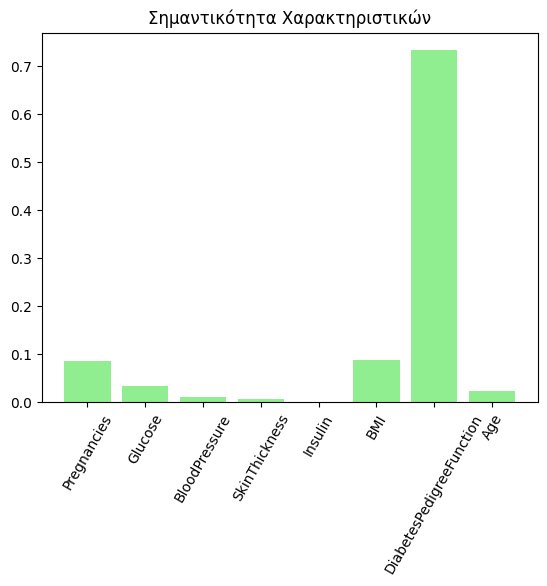

In [9]:
coefficients = logReg.coef_[0]
importance = np.abs(coefficients)
names = df.columns[:-1]
plt.bar(names, importance,color='lightgreen')
plt.title("Σημαντικότητα Χαρακτηριστικών")
plt.xticks(rotation=60)
plt.show()

# Part 2 - Unsupervised Learning

## Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

## Load Data

In [18]:
data= pd.read_csv('dataset.csv')
dfS=pd.DataFrame(data)


## Preprocess Variables

1. Remove unnecessary variables
2. Normalize in [0.0, 1.0]

In [19]:
dfS1=dfS.drop(['popularity','duration_ms','explicit','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature'], axis=1)
dfS2=dfS.drop(['Unnamed: 0','track_id','artists','album_name','track_name','track_genre'],axis=1)
scaler = MinMaxScaler()
scaled_dfS2=scaler.fit_transform(dfS2)


## Apply K-Means Clustering

cluster
0    0.031918
1    0.067631
2    0.019520
3    0.047553
4    0.026372
5    0.109337
6    0.018202
7    0.068156
8    0.072139
Name: proportion, dtype: float64


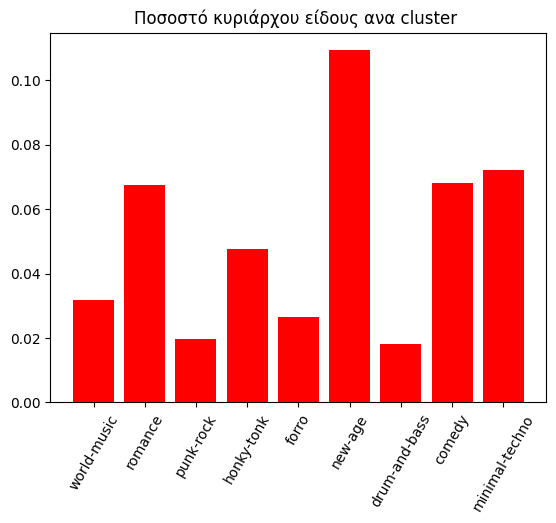

In [20]:
kmeans = KMeans(n_clusters=9, random_state=0, n_init="auto").fit_predict(scaled_dfS2)
dfS['cluster'] = kmeans
genres= dfS.groupby("cluster")["track_genre"].agg(lambda x: x.value_counts().index[0])
precentage= dfS.groupby("cluster")["track_genre"].value_counts(normalize=True).groupby(level=0).max()
print(precentage)
plt.bar(genres, precentage,color='red')
plt.title("Ποσοστό κυριάρχου είδους ανα cluster ")
plt.xticks(rotation=60)
plt.show()

## Select a Song

Select a known song to you, or select and listen a random song. Then, plot its attributes (from the original dataset).

In [21]:
selected="The Nights"
selected_row=dfS[dfS["track_name"]==selected].iloc[0]
print("Title: ",selected,", Artists: ",selected_row["artists"],", cluster",selected_row["cluster"])

Title:  The Nights , Artists:  Avicii , cluster 0


## Find Top-10 Songs

Find the 10 most similar songs. Listen to the selected songs and suggest whether they are similar to the selected song. Then, print a table with their attributes.

In [22]:
index=selected_row.name
normalizedDFS2=pd.DataFrame(scaled_dfS2,columns=dfS2.columns)
song_vector=normalizedDFS2.iloc[index].values.reshape(1,-1)

songIndexSameCluster=dfS[dfS["cluster"] == selected_row["cluster"]].index
vectorCluster= normalizedDFS2.loc[songIndexSameCluster]
distance=euclidean_distances(song_vector,vectorCluster)
distances=distance[0]
top_10=songIndexSameCluster[np.argsort(distances)[1:11]]
recommendation=dfS.loc[top_10][["track_name","artists","track_genre"]]
print(recommendation)

                               track_name  \
81183                          The Nights   
30010                          The Nights   
53703                                 BED   
30659                                 BED   
47063         You Shook Me All Night Long   
19503                   Life is a Highway   
31877                   I Really Like You   
55032  Dance Ka Bhoot (From "Brahmastra")   
82202                           Sweetness   
8257    Drunk (And I Don't Wanna Go Home)   

                                        artists track_genre  
81183                                    Avicii         pop  
30010                                    Avicii         edm  
53703              Joel Corry;RAYE;David Guetta       house  
30659              Joel Corry;RAYE;David Guetta         edm  
47063                                     AC/DC   hard-rock  
19503                             Rascal Flatts     country  
31877                          Carly Rae Jepsen     electro  
55032  P

Κατά την γνώμη μου το τραγούδια ταιριάζουν μεταξύ τους ως προς την μελωδία, ως έναν βαθμό αλλά εκείνο που φάνηκε να ταιριάζει περισσότερο ως προς και τους στίχους ήταν το "life is a highway" . Επιπλέον αξίζει να σημειωθεί ότι με την συγκεκριμένη μέθοδο στο top recommendations εμφανίζεται και το ιδιο το τραγούδι που έχει ανεβεί από διαφορετικά άτομα.